<a href="https://colab.research.google.com/github/Komal-singh37/Solar-Storm-Prediction/blob/main/solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('solar final data.csv',index_col=0)
data.head()

,Time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,Kp index,Prediction
Date,,,,,,,,,,,,,,,,,,,,,
03-03-2024,00:00:00,0,3.33,2.54,3.42,3.00,0.57,3.12,-1.30,-1.52,...,1.40,7.20,273.84,268.02,453.78,14465,10015,641863,2.333,0
03-03-2024,00:30:00,0,3.30,2.96,3.44,3.01,2.67,3.13,-1.33,-1.47,...,2.62,4.17,274.04,271.81,279.26,11611,10386,16248,1.333,0
03-03-2024,01:00:00,0,3.24,2.89,3.38,2.91,2.54,3.08,-1.47,-1.73,...,2.15,3.51,271.92,270.62,273.43,10713,10375,14817,0.667,0
03-03-2024,01:30:00,0,2.70,2.34,3.01,2.29,-0.47,2.74,-1.22,-1.70,...,1.81,3.29,269.22,266.11,278.38,15073,11408,19526,0.667,0
03-03-2024,02:00:00,0,2.94,2.60,3.02,2.46,2.12,2.82,-1.29,-1.74,...,1.76,3.23,269.30,266.25,272.98,14304,10533,17290,1.333,0


In [ ]:
#drop the rows which has the value of Source either -1, -2 and 2

data = data[(data['Source'] != -1) & (data['Source'] != -2)& (data['Source'] != 2)]


In [ ]:
data.head(10)

,Time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,Kp index,Prediction
Date,,,,,,,,,,,,,,,,,,,,,
03-03-2024,00:00:00,0,3.33,2.54,3.42,3.00,0.57,3.12,-1.30,-1.52,...,1.40,7.20,273.84,268.02,453.78,14465,10015,641863,2.333,0
03-03-2024,00:30:00,0,3.30,2.96,3.44,3.01,2.67,3.13,-1.33,-1.47,...,2.62,4.17,274.04,271.81,279.26,11611,10386,16248,1.333,0
03-03-2024,01:00:00,0,3.24,2.89,3.38,2.91,2.54,3.08,-1.47,-1.73,...,2.15,3.51,271.92,270.62,273.43,10713,10375,14817,0.667,0
03-03-2024,01:30:00,0,2.70,2.34,3.01,2.29,-0.47,2.74,-1.22,-1.70,...,1.81,3.29,269.22,266.11,278.38,15073,11408,19526,0.667,0
03-03-2024,02:00:00,0,2.94,2.60,3.02,2.46,2.12,2.82,-1.29,-1.74,...,1.76,3.23,269.30,266.25,272.98,14304,10533,17290,1.333,0
03-03-2024,02:30:00,0,2.57,2.16,2.77,1.84,0.68,2.25,-1.19,-1.57,...,1.92,3.06,269.38,266.70,278.08,17846,13788,22591,0.000,0
03-03-2024,03:00:00,0,2.40,2.01,2.69,1.89,1.01,2.35,-0.51,-2.25,...,1.70,3.87,268.08,266.39,274.97,17810,10516,21979,0.333,0
03-03-2024,03:30:00,0,2.65,2.28,4.27,2.27,-0.55,2.67,-1.16,-4.00,...,2.15,24.97,268.49,260.00,326.13,17224,13403,41519,0.667,0
03-03-2024,04:00:00,0,2.99,2.01,3.26,1.07,0.38,1.44,-2.69,-2.90,...,3.14,22.20,287.58,282.95,315.91,36420,10235,109654,2.667,0


In [ ]:
#drop the fields phi-mean, phi-med, phi-max, theta-med, theta-max, theta-min

data = data.drop(['Phi-mean', 'Phi-min', 'Phi-max', 'Theta-med', 'Theta-max', 'Theta-min'], axis=1)


In [ ]:
data.head()

,Time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,Kp index,Prediction
Date,,,,,,,,,,,,,,,,,,,,,
03-03-2024,00:00:00,0,3.33,2.54,3.42,3.00,0.57,3.12,-1.30,-1.52,...,1.40,7.20,273.84,268.02,453.78,14465,10015,641863,2.333,0
03-03-2024,00:30:00,0,3.30,2.96,3.44,3.01,2.67,3.13,-1.33,-1.47,...,2.62,4.17,274.04,271.81,279.26,11611,10386,16248,1.333,0
03-03-2024,01:00:00,0,3.24,2.89,3.38,2.91,2.54,3.08,-1.47,-1.73,...,2.15,3.51,271.92,270.62,273.43,10713,10375,14817,0.667,0
03-03-2024,01:30:00,0,2.70,2.34,3.01,2.29,-0.47,2.74,-1.22,-1.70,...,1.81,3.29,269.22,266.11,278.38,15073,11408,19526,0.667,0
03-03-2024,02:00:00,0,2.94,2.60,3.02,2.46,2.12,2.82,-1.29,-1.74,...,1.76,3.23,269.30,266.25,272.98,14304,10533,17290,1.333,0


In [ ]:
data.nunique()


Time            48
Source           2
Bt-med         715
Bt-min         761
Bt-max         727
Bx-med         811
Bx-min         758
Bx-max         787
By-med         876
By-min         867
By-max         861
Bz-med         818
Bz-min         796
Bz-max         807
Dens-med       687
Dens-min       591
Dens-max       851
Speed-med     1265
Speed-min     1272
Speed-max     1259
Temp-med      1326
Temp-min      1312
Temp-max      1313
Kp index        21
Prediction       2
dtype: int64

In [ ]:
#Now checking missing data
round(100*(data.isnull().sum()/len(data.index)), 2)

Time          0.0
Source        0.0
Bt-med        0.0
Bt-min        0.0
Bt-max        0.0
Bx-med        0.0
Bx-min        0.0
Bx-max        0.0
By-med        0.0
By-min        0.0
By-max        0.0
Bz-med        0.0
Bz-min        0.0
Bz-max        0.0
Dens-med      0.0
Dens-min      0.0
Dens-max      0.0
Speed-med     0.0
Speed-min     0.0
Speed-max     0.0
Temp-med      0.0
Temp-min      0.0
Temp-max      0.0
Kp index      0.0
Prediction    0.0
dtype: float64

In [ ]:
len(data)
data= data.dropna(axis=0)

In [ ]:
len(data)

1337

In [ ]:
rows = len(data.axes[0])
cols = len(data.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  1337
Number of Columns:  25


In [ ]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Time          0.0
Source        0.0
Bt-med        0.0
Bt-min        0.0
Bt-max        0.0
Bx-med        0.0
Bx-min        0.0
Bx-max        0.0
By-med        0.0
By-min        0.0
By-max        0.0
Bz-med        0.0
Bz-min        0.0
Bz-max        0.0
Dens-med      0.0
Dens-min      0.0
Dens-max      0.0
Speed-med     0.0
Speed-min     0.0
Speed-max     0.0
Temp-med      0.0
Temp-min      0.0
Temp-max      0.0
Kp index      0.0
Prediction    0.0
dtype: float64

In [ ]:
data.head()

,Time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,Kp index,Prediction
Date,,,,,,,,,,,,,,,,,,,,,
03-03-2024,00:00:00,0,3.33,2.54,3.42,3.00,0.57,3.12,-1.30,-1.52,...,1.40,7.20,273.84,268.02,453.78,14465,10015,641863,2.333,0
03-03-2024,00:30:00,0,3.30,2.96,3.44,3.01,2.67,3.13,-1.33,-1.47,...,2.62,4.17,274.04,271.81,279.26,11611,10386,16248,1.333,0
03-03-2024,01:00:00,0,3.24,2.89,3.38,2.91,2.54,3.08,-1.47,-1.73,...,2.15,3.51,271.92,270.62,273.43,10713,10375,14817,0.667,0
03-03-2024,01:30:00,0,2.70,2.34,3.01,2.29,-0.47,2.74,-1.22,-1.70,...,1.81,3.29,269.22,266.11,278.38,15073,11408,19526,0.667,0
03-03-2024,02:00:00,0,2.94,2.60,3.02,2.46,2.12,2.82,-1.29,-1.74,...,1.76,3.23,269.30,266.25,272.98,14304,10533,17290,1.333,0


In [ ]:
data = data.drop(['Bt-min','Bt-max', 'Bx-min','Bx-max', 'By-max','By-min','Bz-min','Bz-max', 'Dens-min', 'Dens-max', 'Temp-min','Temp-max'], axis=1)


In [ ]:
data.head()

,Time,Source,Bt-med,Bx-med,By-med,Bz-med,Dens-med,Speed-med,Speed-min,Speed-max,Temp-med,Kp index,Prediction
Date,,,,,,,,,,,,,
03-03-2024,00:00:00,0,3.33,3.00,-1.30,-0.52,2.63,273.84,268.02,453.78,14465,2.333,0
03-03-2024,00:30:00,0,3.30,3.01,-1.33,0.09,3.04,274.04,271.81,279.26,11611,1.333,0
03-03-2024,01:00:00,0,3.24,2.91,-1.47,-0.03,2.92,271.92,270.62,273.43,10713,0.667,0
03-03-2024,01:30:00,0,2.70,2.29,-1.22,-0.63,2.23,269.22,266.11,278.38,15073,0.667,0
03-03-2024,02:00:00,0,2.94,2.46,-1.29,-0.51,2.41,269.30,266.25,272.98,14304,1.333,0


In [ ]:
data = data.drop(['Time', 'Source', 'Speed-min', 'Speed-max'], axis=1)

In [ ]:
data.head()

,Bt-med,Bx-med,By-med,Bz-med,Dens-med,Speed-med,Temp-med,Kp index,Prediction
Date,,,,,,,,,
03-03-2024,3.33,3.00,-1.30,-0.52,2.63,273.84,14465,2.333,0
03-03-2024,3.30,3.01,-1.33,0.09,3.04,274.04,11611,1.333,0
03-03-2024,3.24,2.91,-1.47,-0.03,2.92,271.92,10713,0.667,0
03-03-2024,2.70,2.29,-1.22,-0.63,2.23,269.22,15073,0.667,0
03-03-2024,2.94,2.46,-1.29,-0.51,2.41,269.30,14304,1.333,0


In [ ]:
#list all the columns

print(data.columns)


Index(['Bt-med', 'Bx-med', 'By-med', 'Bz-med', 'Dens-med', 'Speed-med',
       'Temp-med', 'Kp index', 'Prediction'],
      dtype='object')


In [ ]:
data = data.drop(['Temp-med','Bx-med', 'By-med'], axis=1)

In [ ]:
data.head()

,Bt-med,Bz-med,Dens-med,Speed-med,Kp index,Prediction
Date,,,,,,
03-03-2024,3.33,-0.52,2.63,273.84,2.333,0
03-03-2024,3.30,0.09,3.04,274.04,1.333,0
03-03-2024,3.24,-0.03,2.92,271.92,0.667,0
03-03-2024,2.70,-0.63,2.23,269.22,0.667,0
03-03-2024,2.94,-0.51,2.41,269.30,1.333,0


In [ ]:
# creating a column named Mass flux which has the values of column Dens-med and Speed- Med multiplied

data['Mass flux'] = data['Dens-med'] * data['Speed-med']


In [ ]:
data.head()

,Bt-med,Bz-med,Dens-med,Speed-med,Kp index,Prediction,Mass flux
Date,,,,,,,
03-03-2024,3.33,-0.52,2.63,273.84,2.333,0,720.1992
03-03-2024,3.30,0.09,3.04,274.04,1.333,0,833.0816
03-03-2024,3.24,-0.03,2.92,271.92,0.667,0,794.0064
03-03-2024,2.70,-0.63,2.23,269.22,0.667,0,600.3606
03-03-2024,2.94,-0.51,2.41,269.30,1.333,0,649.0130


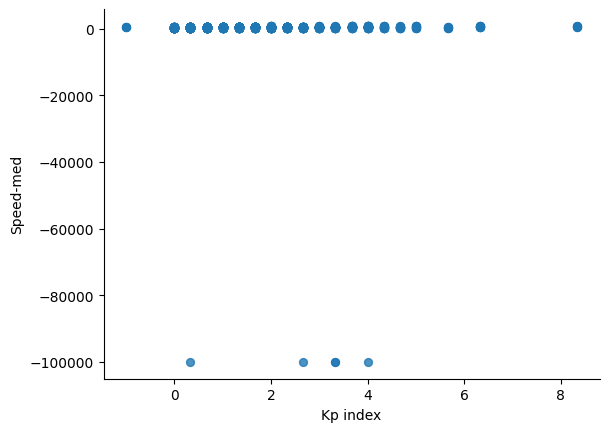

In [ ]:
# @title Speed-med vs Kp index

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Kp index', y='Speed-med', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# importing the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc
import matplotlib.pyplot as plt


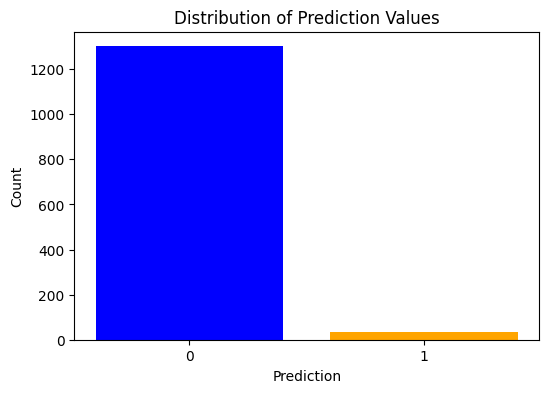

In [ ]:
# plot to get number of 0 and 1 values in the Prediction column

# Create a bar plot to show the distribution of values in the 'Prediction' column
plt.figure(figsize=(6, 4))
plt.bar(['0', '1'], data['Prediction'].value_counts(), color=['blue', 'orange'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Distribution of Prediction Values')
plt.show()


In [ ]:
X=data.drop(['Prediction'], axis= 1)
y = data['Prediction']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [ ]:
# LogisticRegression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)


Accuracy: 0.9705882352941176


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


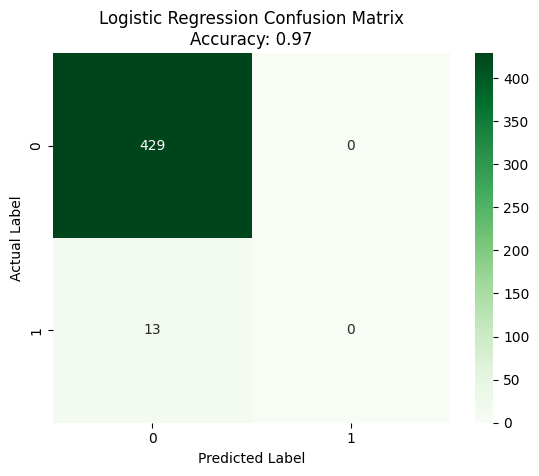

In [ ]:
# prompt: sns heatmap of actual and predicted label in logistic regression with accuracy score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# Set the labels for the axes
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Set the title of the plot
plt.title("Logistic Regression Confusion Matrix\nAccuracy: {:.2f}".format(accuracy))

# Show the plot
plt.show()


In [ ]:
#random forest classification

from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier object
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
clf.fit(X_train, y_train)
# Predict the labels for the test data
y_pred = clf.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


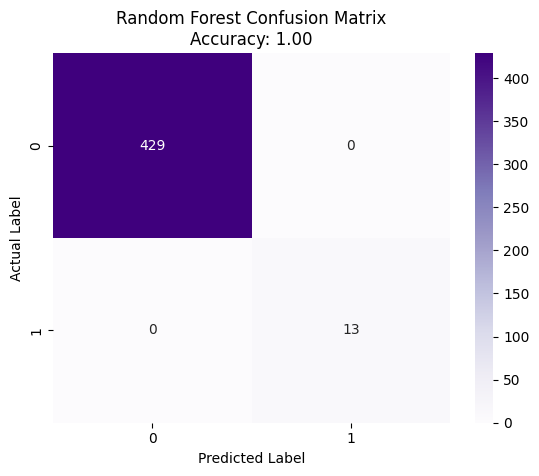

In [ ]:
# prompt: confusion matrix of random forest classifier

# Create a confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Purples")

# Set the labels for the axes
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Set the title of the plot
plt.title("Random Forest Confusion Matrix\nAccuracy: {:.2f}".format(accuracy))

# Show the plot
plt.show()


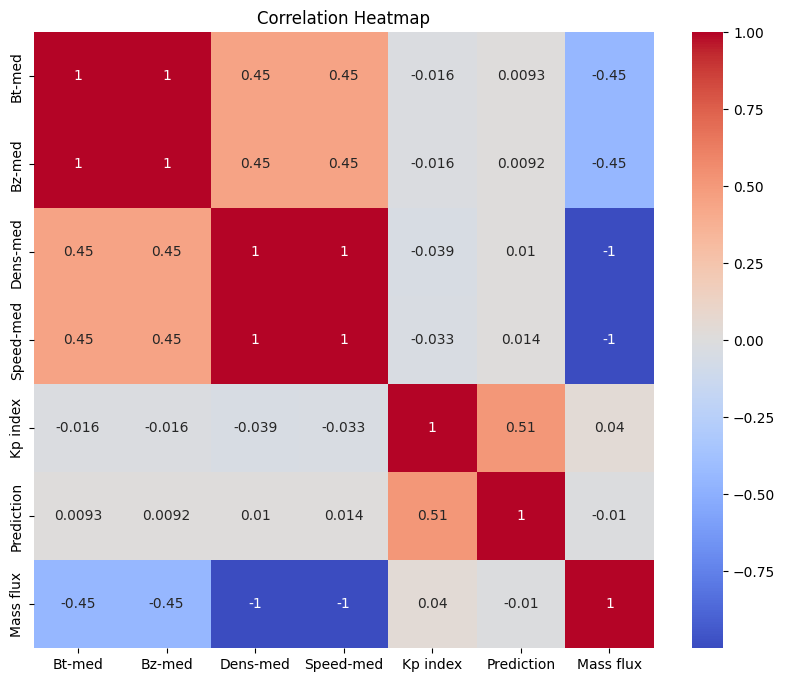

In [ ]:
# sns heatmap

import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#decision tree

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dt_clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = dt_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
# import support vector machine

from sklearn import svm

from sklearn.svm import SVC

# Create a support vector machine classifier
clf = svm.SVC()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.9705882352941176


In [ ]:
# bernoullli naive baye's classification

from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Naive Bayes object
bnb_clf = BernoulliNB()

# Fit the model to the training data
bnb_clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = bnb_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9638009049773756


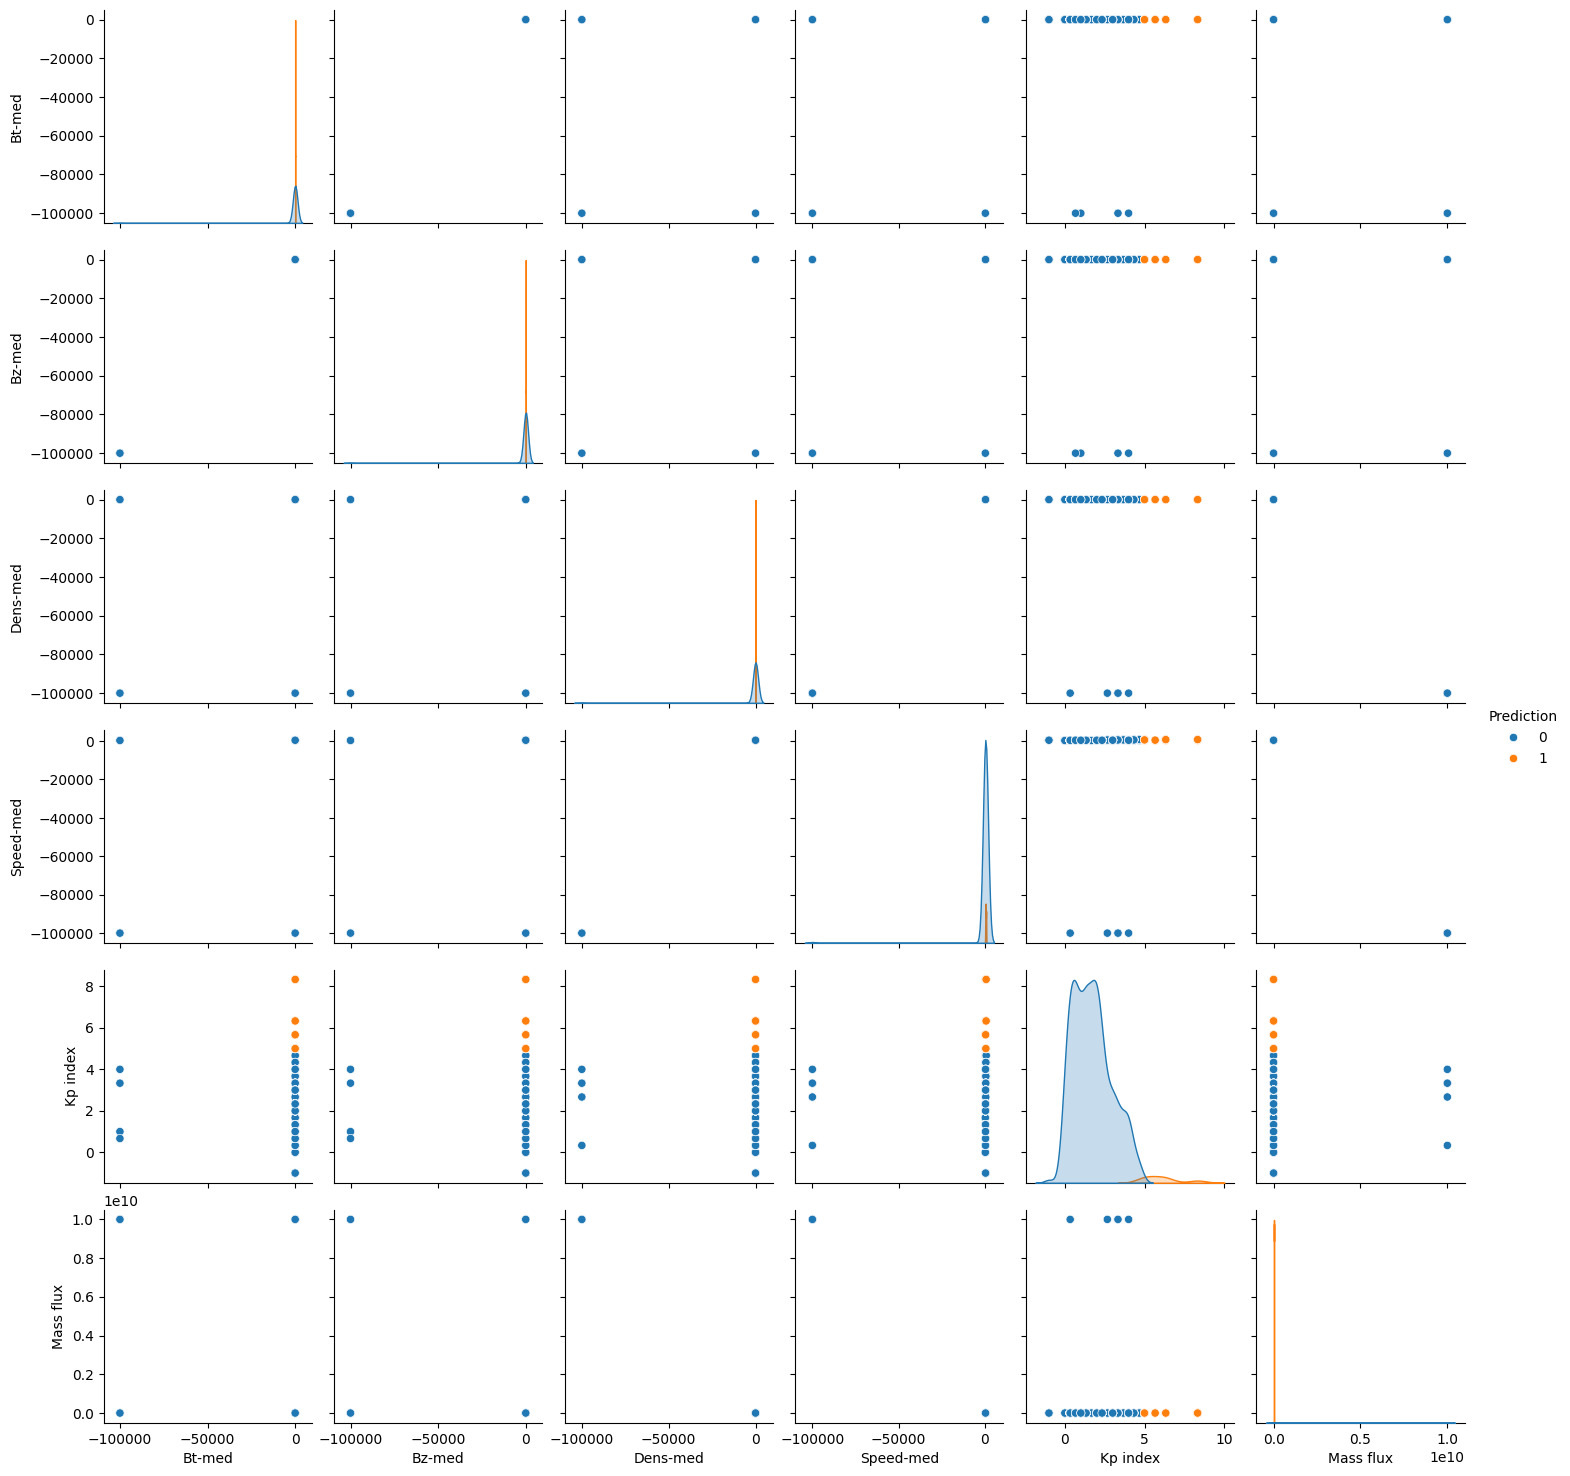

In [ ]:
# prompt: pairplot of features

sns.pairplot(data, hue='Prediction')


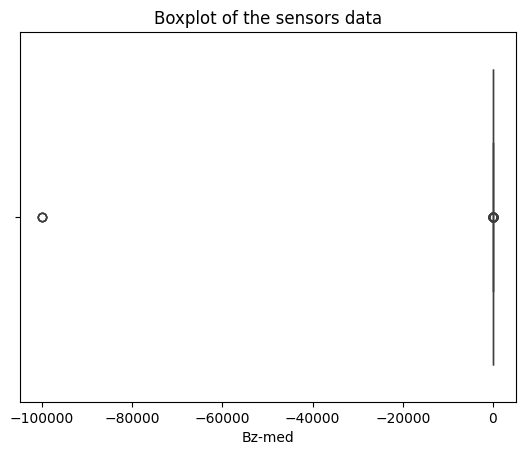

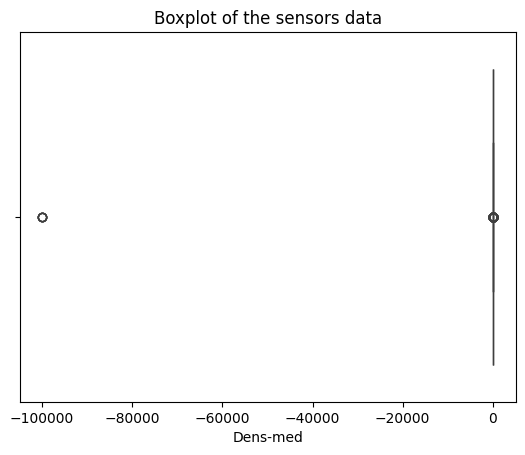

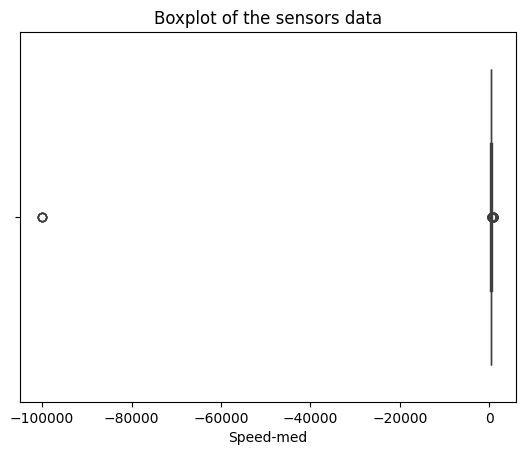

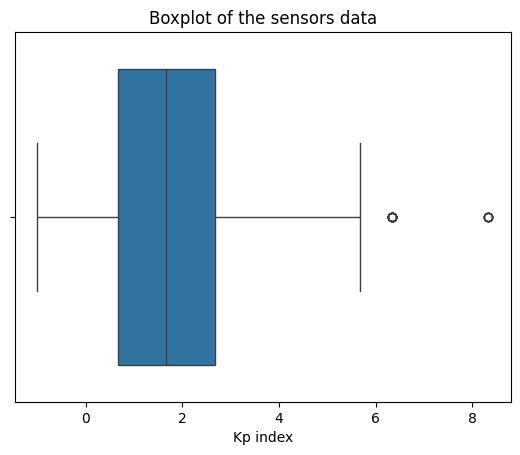

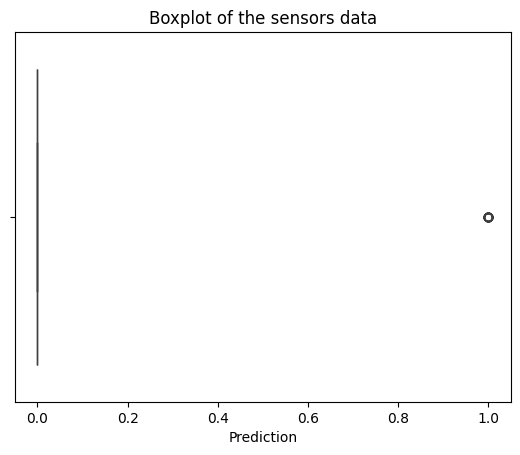

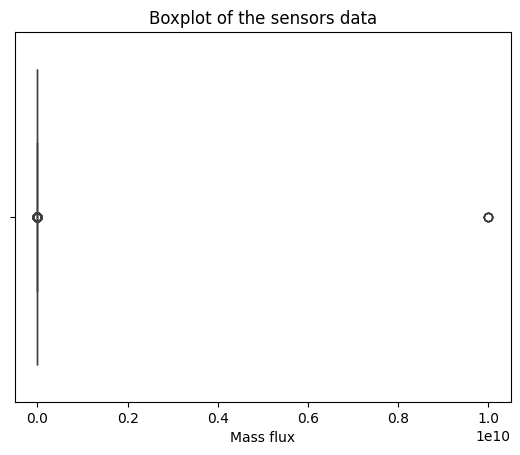

In [ ]:
for i in data.columns[1:11]:
    sns.boxplot(x=data[i])
    plt.title('Boxplot of the sensors data')
    plt.show()